# Business Case

Road accidents are extremely common over the world so that AI driven cars is a future topic. Cards drived by humans often leads to a loss of property and even life. Wouldn’t it be great to be able to understand what are the most common causes, in order to prevent them from happening? With this analysis, I am attempting to understand these factors and their correlation. This analysis has multiple applications like an app that will prompt the drivers to be more careful depending on the weather and road conditions on any given day or a way for the police to enforce more safety protocols. Also people who really care about the traffic records, especially in the transportation department or mayor als representant of the city. Also, we want to figure out the reason for collisions and help to reduce accidents in the future.

# Data

This is an extensive data set from the Seattle Police Department, with over 190,000 observations collected from 2004 till present. 
We will use SEVERITYCODE as our dependent variable Y, and try different combinations of independent variables X to get the result. 

Other important variables include:
- ADDRTYPE: Collision address type: Alley, Block, Intersection
- LOCATION: Description of the general location of the collision
- PERSONCOUNT: The total number of people involved in the collision helps identify severity involved
- PEDCOUNT: The number of pedestrians involved in the collision helps identify severity involved
- PEDCYLCOUNT: The number of bicycles involved in the collision helps identify severity involved
- VEHCOUNT: The number of vehicles involved in the collision identify severity involved
- JUNCTIONTYPE: Category of junction at which collision took place helps identify where most collisions occur
- WEATHER: A description of the weather conditions during the time of the collision
- ROADCOND: The condition of the road during the collision
- LIGHTCOND: The light conditions during the collision
- SPEEDING: Whether or not speeding was a factor in the collision (Y/N)
- SEGLANEKEY: A key for the lane segment in which the collision occurred
- CROSSWALKKEY: A key for the crosswalk at which the collision occurred
- HITPARKEDCAR: Whether or not the collision involved hitting a parked car

# Methodology

I used Jupyter Notebooks to conduct that analysis and imported all the necessary Python libraries like Pandas, Numpy, Matplotlib, and Seaborn. The data was mostly categorical so I stuck to graphical representation to see correlation between various variables.
I started by importing the csv file and to prepare the data, I dropped the columns we do not need from the dataset, i.e., columns that do not have values or where the values are unknown. Even though this is an important factor, I dropped Speeding entirely because it is missing over 180,000 values and this can hamper the results.

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [41]:
df=pd.read_csv("Data-Collisions.csv",low_memory=False)
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [42]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [44]:
df[df.SPEEDING.notna()]

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
24,2,-122.279658,47.553405,33,1268,1268,3672152,Matched,Intersection,33499.0,...,Dry,Daylight,NaN,NaN,Y,14,From same direction - both going straight - on...,0,0,N
43,2,-122.337348,47.520472,53,56100,56100,2619853,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6256005.0,Y,50,Fixed object,0,0,N
62,1,-122.376182,47.499490,74,32000,32000,1215388,Matched,Block,NaN,...,Dry,Daylight,NaN,4176028.0,Y,32,One parked--one moving,0,0,N
123,1,-122.333924,47.604678,140,29700,29700,1482326,Matched,Block,NaN,...,Wet,Daylight,NaN,4065042.0,Y,14,From same direction - both going straight - on...,0,0,N
124,2,-122.322187,47.618733,141,1135,1135,3605976,Matched,Intersection,29069.0,...,Dry,Daylight,NaN,NaN,Y,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194414,1,-122.293204,47.542648,219238,309651,310931,3815072,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,NaN,Y,32,One parked--one moving,0,0,Y
194428,2,-122.320008,47.625350,219255,309595,310875,E881229,Matched,Intersection,28982.0,...,Dry,Dusk,NaN,NaN,Y,0,Vehicle going straight hits pedestrian,0,0,N
194481,2,-122.307643,47.541919,219317,308340,309620,3578649,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,Y,88,All Other Multi Vehicle,0,0,N
194492,1,NaN,NaN,219329,308810,310090,3811388,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,NaN,Y,14,From same direction - both going straight - on...,0,0,N


In [45]:
df["SEVERITYCODE"].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


Our target variable SEVERITYCODE is only 42% balanced. In fact, severitycode in class 1 is nearly three times the size of class 2.

In [46]:
total_cases=df["SEVERITYCODE"].value_counts().sum()
df["SEVERITYCODE"].value_counts()/total_cases*100

1    70.109877
2    29.890123
Name: SEVERITYCODE, dtype: float64

In [47]:
from sklearn import preprocessing

#Converting Severity Code from (1/2) tp (0/1)
severity_code = df['SEVERITYCODE'].values

labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

df["SEVERITYCODE"] = severity_code

severity_code

array([1, 0, 0, ..., 1, 1, 0])

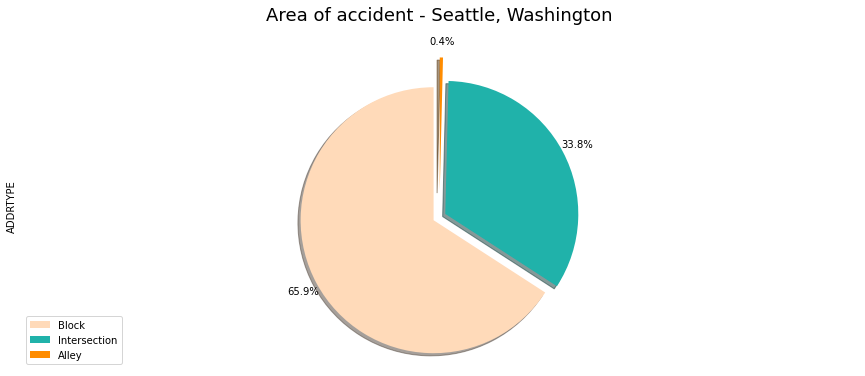

In [48]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [49]:
df["WEATHER"].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [50]:
df["COLLISIONTYPE"].value_counts().to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [51]:
df["ROADCOND"].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


All kind of wet weather conditions leads to more accidents

In [52]:
df["LIGHTCOND"].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


<AxesSubplot:>

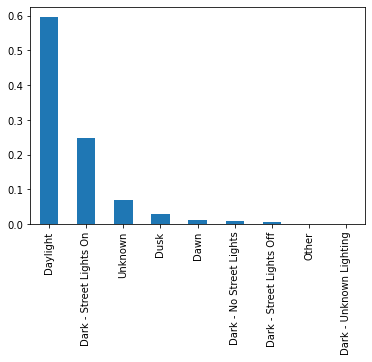

In [53]:
(df["LIGHTCOND"].value_counts()/total_cases).plot(kind="bar")

In [54]:
df["INATTENTIONIND"].value_counts().to_frame()

,INATTENTIONIND
Y,29805


In [55]:
df["INATTENTIONIND"].value_counts()/total_cases

Y    0.153103
Name: INATTENTIONIND, dtype: float64

In [56]:
df["UNDERINFL"].value_counts().to_frame()

,UNDERINFL
N,100274
0,80394
Y,5126
1,3995


On the first look it seems that crashes happened in clear, dry, and bright conditions. Most days are clear, dry, and bright, so it’s no surprise that most car crashes occur under these conditions. 
Further it also seems that crashes with a distracted driver or an impaired driver are statistically more likely to result in injury

# Data cleaning

Let's clean our data to generate usable features

In [57]:
df["UNDERINFL"].replace(to_replace=['N', 'Y'], value=[0,1], inplace=True)
yes=df["UNDERINFL"].value_counts().to_frame()[0:2].sum()
no=df["UNDERINFL"].value_counts().to_frame()[2:5].sum()

print("Under influence:",yes/total_cases)
print("Not under influence:",no/total_cases)

Under influence: UNDERINFL    0.928059
dtype: float64
Not under influence: UNDERINFL    0.046853
dtype: float64


In [58]:
df["UNDERINFL"].replace("N", 0, inplace=True)
df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)

In [59]:
df['SPEEDING'] 

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
194668    NaN
194669    NaN
194670    NaN
194671    NaN
194672    NaN
Name: SPEEDING, Length: 194673, dtype: object

In [60]:
# in speed we replace Nan with a negative value N
df["SPEEDING"].replace("Y", 1, inplace=True)
df['SPEEDING'] = df['SPEEDING'].fillna(0)
df['SPEEDING'] 

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
194668    0.0
194669    0.0
194670    0.0
194671    0.0
194672    0.0
Name: SPEEDING, Length: 194673, dtype: float64

In [61]:
#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark, 3 = Unknown)
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)
df["LIGHTCOND"].replace(np.nan,"Unknown", inplace=True)
df["LIGHTCOND"].replace("Unknown", 3, inplace=True)

In [62]:
#We assign new values to roadcond Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet, 3=Unknown)
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)
df["ROADCOND"].replace("Unknown", 3, inplace=True)
df["ROADCOND"].replace(np.nan, 3, inplace=True)



In [63]:
#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow, 4= Unknown
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

df["WEATHER"].replace(np.nan, 4, inplace=True)
df["WEATHER"].replace("Unknown", 4, inplace=True)

In [64]:
#Encoding in attention (0 = No, 1 = Yes)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)



In [65]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,...,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SDOTCOLNUM,SPEEDING,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,...,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,194673.000000,1.946730e+05
mean,0.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,...,1.920780,13.867768,0.153103,1.107139,0.819163,0.611482,7.972521e+06,0.047942,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,...,0.631047,6.868755,0.360088,1.495257,1.128447,0.920671,2.553533e+06,0.213644,3315.776055,7.226926e+04
min,0.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000,0.000000e+00
25%,0.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,...,2.000000,11.000000,0.000000,0.000000,0.000000,0.000000,6.040015e+06,0.000000,0.000000,0.000000e+00
50%,0.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,...,2.000000,13.000000,0.000000,0.000000,0.000000,0.000000,8.023022e+06,0.000000,0.000000,0.000000e+00
75%,1.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,...,2.000000,14.000000,0.000000,3.000000,2.000000,1.000000,1.015501e+07,0.000000,0.000000,0.000000e+00
max,1.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,...,12.000000,69.000000,1.000000,4.000000,3.000000,3.000000,1.307202e+07,1.000000,525241.000000,5.239700e+06


## Optimized dataset

In [66]:
#Making new dataframe with only variables and unique keys
selected_columns=["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]
feature_df=df[selected_columns]#.copy()
#feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

In [67]:
feature_df ["LIGHTCOND"].unique()

array([0, 1, 2, 3])

In [68]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   X               189339 non-null  float64
 1   Y               189339 non-null  float64
 2   INCKEY          194673 non-null  int64  
 3   INATTENTIONIND  194673 non-null  float64
 4   UNDERINFL       194673 non-null  object 
 5   WEATHER         194673 non-null  int64  
 6   ROADCOND        194673 non-null  float64
 7   LIGHTCOND       194673 non-null  int64  
 8   SPEEDING        194673 non-null  float64
 9   SEVERITYCODE    194673 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 14.9+ MB


In [69]:
feature_df["SPEEDING"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
194668    0.0
194669    0.0
194670    0.0
194671    0.0
194672    0.0
Name: SPEEDING, Length: 194673, dtype: float64

In [70]:
    #Converting remaining to int
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

<ipython-input-70-2625928d104a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
<ipython-input-70-2625928d104a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
<ipython-input-70-2625928d104a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [75]:
#check trough smooth unique values
for col in feature_df.columns:
    print(col,feature_df[col].unique())

X [-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]
Y [47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]
INCKEY [  1307  52200  26700 ... 311280 309514 308220]
INATTENTIONIND [0 1]
UNDERINFL [0 1]
WEATHER [1 3 0 4 2]
ROADCOND [2. 0. 3. 1.]
LIGHTCOND [0 1 2 3]
SPEEDING [0 1]
SEVERITYCODE [1 0]


In [76]:
print("With nan Values:",feature_df.size)
feature_df=feature_df.dropna()
print("Without nan Values:",feature_df.size)

With nan Values: 1893390
Without nan Values: 1893390


#### Now let's have a look to the map on Seatle

In [90]:
import folium
from folium import plugins

#Make reduced df from feature_df to get a few random points to make map
limit = 10000 #faster mapping
reduced_df = feature_df.iloc [0:limit:5, 0:]

#Folium Map
# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=13)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display interactive map
seattle_map



In [91]:
#Workaround for Notebook export with image
import io
from PIL import Image
img_data = seattle_map._to_png(5)
img = Image.open(io.BytesIO(img_data))
img.save('Seattle.png')

In [92]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Seattle.png")

Here we see that the most accidents are located along the main road. Your first chance to prohibit an accident is to take another way. But that's only a hint :-)

# Training the model

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression



In [35]:
#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (132537, 6) (132537, 1)
Test set: (56802, 6) (56802, 1)


## Selecting model

First let's balanace our data to get a better outcome, because our target variable SEVERITYCODE is only 42% balanced. In fact, severitycode in class 1 is nearly three times the size of class 2. (0 and 1 in our model)

In [37]:
from imblearn.over_sampling import SMOTE

# Balance the Data
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)


In [38]:
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score

### Tree model

A decision tree model gives us a layout of all possible outcomes so we can fully analyze the concequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.

In [39]:

#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(os_data_X,os_data_y)

        #Make Prediction:
yhatDT = DT.predict(X_test)

        #Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))
dt_acc=accuracy_score(yhatDT, y_test)
dt_f1=f1_score(y_test, yhatDT, average='weighted')
print("F1",dt_f1)

        #Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhatDT,y_test))

Accuracy score for Decision Tree =  0.46005422344283653
F1 0.4468765525831609
Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          11505  27908  39413
1           2762  14627  17389
All        14267  42535  56802
              precision    recall  f1-score   support

           0       0.29      0.81      0.43     14267
           1       0.84      0.34      0.49     42535

    accuracy                           0.46     56802
   macro avg       0.57      0.58      0.46     56802
weighted avg       0.70      0.46      0.47     56802



Tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree_model.fit(x_train, y_train)
predicted = Tree_model.predict(x_test)
Tree_f1 = f1_score(y_test, predicted, average='weighted')
Tree_acc = accuracy_score(y_test, predicted)

### Logistic regression

Because our dataset only provides us with two severity code outcomes, our model will only predict one of those two classes. This makes our data binary, which is perfect to use with logistic regression.

In [40]:
#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X,os_data_y)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print("LogLoss",log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))

lr_acc=accuracy_score(yhatLR,yhatLR)
lr_f1 = f1_score(y_test, yhatLR, average='weighted')
print("F1",lr_f1)

print (classification_report(y_test, yhatLR))

cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)

LogLoss 0.6761341512478765
Accuracy 0.4977817682475969
F1 0.5072981549434343
              precision    recall  f1-score   support

           0       0.76      0.40      0.52     39413
           1       0.35      0.72      0.47     17389

    accuracy                           0.50     56802
   macro avg       0.55      0.56      0.50     56802
weighted avg       0.64      0.50      0.51     56802



### KNN

KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.

#### Find best k

In [41]:
error = []
print("Lets go...")
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i).fit(os_data_X,os_data_y)
    pred_i = knn.predict(X_test)
    print(i,pred_i)
    error.append(np.mean(pred_i != y_test))

Lets go...
1 [1 1 0 ... 1 0 0]
2 [0 0 0 ... 0 0 0]
3 [0 0 0 ... 0 0 0]
4 [0 0 0 ... 0 0 0]
5 [0 0 0 ... 0 0 1]
6 [0 0 0 ... 0 0 0]
7 [0 0 0 ... 0 0 1]
8 [0 0 0 ... 0 0 0]
9 [0 0 0 ... 0 0 0]
10 [0 0 0 ... 0 0 0]
11 [0 0 0 ... 0 0 0]
12 [0 0 0 ... 0 0 0]
13 [0 0 0 ... 0 0 0]
14 [0 0 0 ... 0 0 0]
15 [0 0 0 ... 0 0 0]
16 [0 0 0 ... 0 0 0]
17 [0 0 0 ... 0 0 0]
18 [0 0 0 ... 0 0 0]
19 [0 0 0 ... 0 0 0]
20 [0 0 0 ... 0 0 0]
21 [0 0 0 ... 0 0 0]
22 [0 0 0 ... 0 0 0]
23 [0 0 0 ... 0 0 0]
24 [0 0 0 ... 0 0 0]
25 [0 0 0 ... 0 0 0]
26 [0 0 0 ... 0 0 0]
27 [0 0 0 ... 0 0 0]
28 [0 0 0 ... 0 0 0]
29 [0 0 0 ... 0 0 0]
30 [0 0 0 ... 0 0 0]
31 [0 0 0 ... 0 0 0]
32 [0 0 0 ... 0 0 0]
33 [0 0 0 ... 0 0 0]
34 [0 0 0 ... 0 0 0]
35 [0 0 0 ... 0 0 0]
36 [0 0 0 ... 0 0 0]
37 [0 0 0 ... 0 0 0]
38 [0 0 0 ... 0 0 0]
39 [0 0 0 ... 0 0 0]


Text(0, 0.5, 'Mean Error')

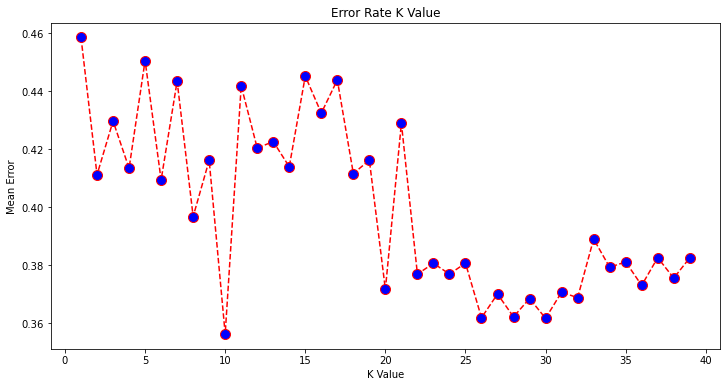

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

We see that with k=10 we will get a good an fast outcome!

In [46]:
k =10

In [47]:
KNN_model = KNeighborsClassifier(n_neighbors = 15).fit(os_data_X,os_data_y)
predicted = KNN_model.predict(X_test)
KNN_f1 = f1_score(y_test, predicted, average='weighted')
KNN_acc = accuracy_score(y_test, predicted)

In [48]:
print(KNN_f1,KNN_acc)

0.5739243286095367 0.5652793915707194


In [49]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67     36420
           1       0.38      0.32      0.35     20382

    accuracy                           0.57     56802
   macro avg       0.51      0.51      0.51     56802
weighted avg       0.55      0.57      0.56     56802



## Model results

Now we will check the accuracy of our models.

In [50]:
df_results=pd.DataFrame({"Model":["Decision Tree","Logistic recession","KNN"],"F1":[dt_f1,lr_f1,KNN_f1],"Accuracy":[dt_acc,lr_acc,KNN_acc]}).set_index("Model")
df_results

,F1,Accuracy
Model,,
Decision Tree,0.446877,0.460054
Logistic recession,0.507298,1.000000
KNN,0.573924,0.565279


Evaluation metrics used to test the accuracy of our models were jaccard index and f-1 score for logistic regression. Choosing different k, max depth and hyparameter C values helped to improve our accuracy to be the best possible.

Once we analyzed and cleaned the data, it was then fed through three ML models; K-Nearest Neighbor, Decision Tree and Logistic Regression. Although the first two are ideal for this project, logistic regression made most sense because of its binary nature. In our result overview is an accurarcy of 1 maybe a hint for overfitting our model. 

# Conclusion

For a final solution we have to add Domain knowledge to our results to interpret them in a proper way. With our Logistic regression we built a suitable model which we need to proof with knowledge from our domain part.
After this final review we will be able to make a list of the biggest influence for car accidents in Seattle. Maybe this will be more street light, maybe some impossible factors like the weather. In the last case there will be only a solution to adapt the street rules to enhance security for all the people.